In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('/home/lionex/bin/Python/bupa.csv')
data.sum().info()
data.shape

<class 'pandas.core.series.Series'>
Index: 7 entries, 85 to 1
Series name: None
Non-Null Count  Dtype  
--------------  -----  
7 non-null      float64
dtypes: float64(1)
memory usage: 112.0+ bytes


(344, 7)

<AxesSubplot: >

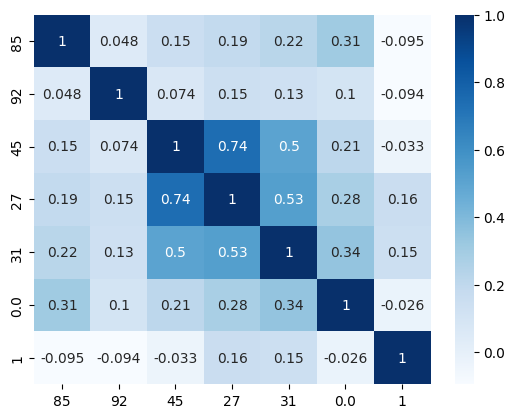

In [10]:
sns.heatmap(data.corr(), cmap='Blues', annot=True)

In [82]:
X = data.iloc[:,[2,3]].values


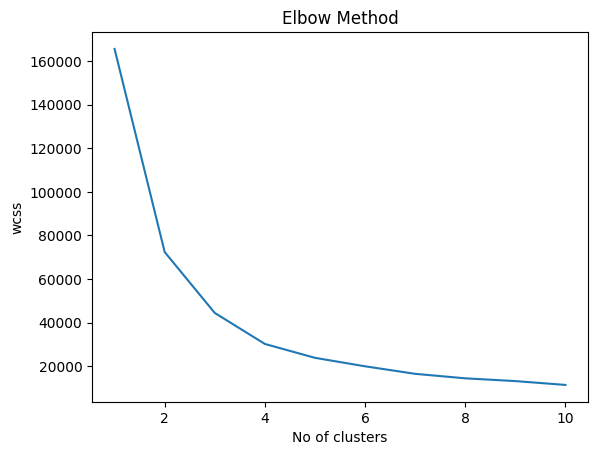

In [77]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11),wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show() 

In [79]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_predict = kmeans.fit_predict(X)

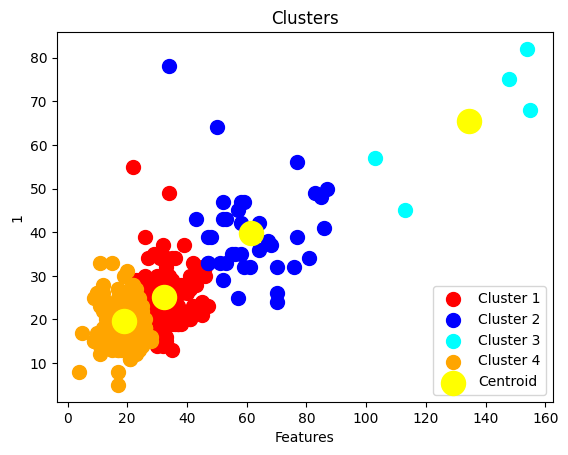

In [81]:
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s = 100, c ='red', label = 'Cluster 1')
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s = 100, c ='blue', label = 'Cluster 2')
plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1], s = 100, c ='cyan', label = 'Cluster 3')
plt.scatter(X[y_predict == 3, 0], X[y_predict == 3, 1], s = 100, c ='orange', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300, c='yellow', label='Centroid')
plt.title('Clusters')
plt.xlabel('Features')
plt.ylabel('1')
plt.legend()
plt.show()